In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [2]:
root_dir = './results/mixmg-auto3to9/'
order = ['MLE', 'DRSL']
metric_names = ['Ori. Test', 'Gau. Test', 'Jit. Test', 'Worst NB', 'Avg. NB']

parsed_data = []
for item in glob.glob(f'{root_dir}/*.log.res'):
    file_name = item.split('/')[-1]
    data_name = file_name.split('_')[0]
    with open(item, 'r') as f:
        content = f.readlines()[1:]
    for method, res_str in zip(order, content):
        row = [data_name, method] + res_str.strip().split(',')
        parsed_data.append(row)

df = pd.DataFrame(parsed_data, columns = ['Dataset', 'Method'] + metric_names)
df.sort_values(by = ['Dataset', 'Method'], inplace = True)
df.set_index(['Dataset', 'Method'], inplace = True)
df[metric_names] = df[metric_names].astype('f4')

df

Ori. Test   Gau. Test    Jit. Test    Worst NB  \
Dataset      Method                                                   
airquality   DRSL     9.288400 -274.580597  -322.602203 -290.948212   
             MLE      9.533900 -347.305115  -879.701904 -380.052887   
energy       DRSL    -7.550500  -32.030899   -63.250702  -50.286999   
             MLE     -6.583400  -39.745602   -91.094803  -67.259300   
hepmass      DRSL   -25.145399  -29.236401   -26.083799  -31.306200   
             MLE    -24.358101  -28.521099   -25.457100  -30.886900   
miniboone    DRSL   -24.283800  -43.800301   -53.852200  -51.960499   
             MLE    -21.412100  -44.582199   -56.178299  -53.588402   
mnist        DRSL    -3.569100   -6.007800    -6.557000 -634.852112   
             MLE     -0.587500   -4.405700    -5.869900 -637.950073   
onlinenews   DRSL    -1.611000 -240.223907 -1009.900208 -627.790710   
             MLE     -1.215000 -256.995514 -1013.915771 -632.707520   
parkinson    DRSL    -5.467400  -14.299000   -15.882700  -18.825199   
             MLE     -3.810300  -16.134199   -20.469700  -21.203100   
sdd          DRSL     0.618100  -95.170700   -65.477997  -95.492699   
             MLE     -3.829600  -55.584900   -50.195301  -57.798302   
superconduct DRSL    59.431198 -235.209793  -880.963501 -249.901398   
             MLE     62.822102 -384.211700 -1480.382446 -394.988312   

                        Avg. NB  
Dataset      Method              
airquality   DRSL   -104.088402  
             MLE    -137.122406  
energy       DRSL    -21.921400  
             MLE     -23.708000  
hepmass      DRSL    -27.061300  
             MLE     -26.312300  
miniboone    DRSL    -32.670898  
             MLE     -31.382700  
mnist        DRSL   -264.535889  
             MLE    -264.600098  
onlinenews   DRSL   -115.915199  
             MLE    -120.184700  
parkinson    DRSL    -10.070900  
             MLE     -10.570300  
sdd          DRSL    -86.708504  
             MLE     -53.034401  
superconduct DRSL   -101.633598  
             MLE    -164.142807

In [3]:
cond = df.index.get_level_values('Method') == 'DRSL'
drsl_total = df[cond].sum()

cond = df.index.get_level_values('Method') == 'MLE'
mle_total = df[cond].sum()

diff = drsl_total - mle_total 
diff = diff.to_numpy()
diff /= 9

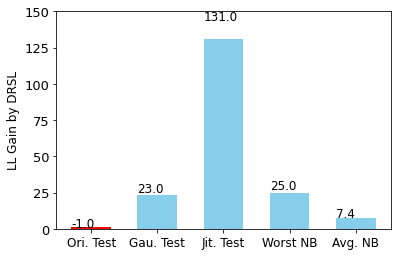

In [16]:
if 0:
    # over write with summarized result from cnet experiement
    x = [-68.0598	,-521.0457,	-1340.065,	-279.2146	,-121.2672]
    y = [-81.5359,	-534.8913,	-1436.5287,	-299.8358,	-129.6876]
    diff = np.array([v1-v2 for v1,v2 in zip(x,y)])

# print the loglikelihood gain 

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = [6,4])
bar_color = ['skyblue' if item > 0 else 'red' for item in diff]
bars = plt.bar(metric_names, np.abs(diff), color = bar_color, width = 0.6)

for i,bar in enumerate(bars):
    yval = diff[i]
    plt.text(bar.get_x(), abs(yval) * 1.1 , '{:.1f}'.format(yval)  , fontsize = 12)

# plt.xlabel('Metrics')
plt.ylabel('LL Gain by DRSL', fontsize = 12)
# plt.yscale('log', base = 2) 
# plt.title('Bar Plot of Metrics')
ax = plt.gca()
# ax.set_xlim([xmin, xmax])
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 13)
ax.set_ylim([0, 150])
# plt.axvline(2.5, color='black', linestyle='-', linewidth=1.5)
plt.savefig('fig.pdf')
plt.show()


In [5]:
# copy to google sheet
print(df.to_csv(index = False))

Ori. Test,Gau. Test,Jit. Test,Worst NB,Avg. NB
9.2884,-274.5806,-322.6022,-290.9482,-104.0884
9.5339,-347.3051,-879.7019,-380.0529,-137.1224
-7.5505,-32.0309,-63.2507,-50.287,-21.9214
-6.5834,-39.7456,-91.0948,-67.2593,-23.708
-25.1454,-29.2364,-26.0838,-31.3062,-27.0613
-24.3581,-28.5211,-25.4571,-30.8869,-26.3123
-24.2838,-43.8003,-53.8522,-51.9605,-32.6709
-21.4121,-44.5822,-56.1783,-53.5884,-31.3827
-3.5691,-6.0078,-6.557,-634.8521,-264.5359
-0.5875,-4.4057,-5.8699,-637.9501,-264.6001
-1.611,-240.2239,-1009.9002,-627.7907,-115.9152
-1.215,-256.9955,-1013.9158,-632.7075,-120.1847
-5.4674,-14.299,-15.8827,-18.8252,-10.0709
-3.8103,-16.1342,-20.4697,-21.2031,-10.5703
0.6181,-95.1707,-65.478,-95.4927,-86.7085
-3.8296,-55.5849,-50.1953,-57.7983,-53.0344
59.4312,-235.2098,-880.9635,-249.9014,-101.6336
62.8221,-384.2117,-1480.3824,-394.9883,-164.1428

